## Optimization of LJ clusters using basin hopping

    The basin hopping algorithm transforms the potential energy space into a collection of interconnecting staircases, (Wales, Doye, 1998).  This transformation of the energy space, changes the geometry of the space, with the new geometry being characterized by the local minima.  This transformation however does not change the local minima themselves. 
    
    The algorithm is iterative using the following conditions:  random selection of the coordinates, minimization and acceptance of new mimima values based on the parameter T.  The acceptance test uses a particular monte carlo algorithm called the Metropolis criterion.  (https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.basinhopping.html)

In [64]:
def init_pos(N_atom, L = 5):
    '''Returns an array containing the cartesian coordinates of N atoms within a bounded cube of length L
       
       Also returns the average distance computed by the body diagonal of the cube divided by the number of atoms'''
    
    import numpy as np
    
    return L*np.random.random(N_atom*3)
            

    


def LjN_min(N_atoms,max_iter,temp,step):
    '''Uses bassin hopping in conjunction with vectorized position and energy functions
    to minimize the energy of an Lj system'''
    def Total_Energy_Lj(r):
        '''To be used in conjucton with init_pos in order to compute Lj potentials
           Input a random array of cartesian coordinates for N_atoms
           Using matrices the distances between the atoms are calculated
           Using distances the Lj potential for each atom is calculated, then summed for the total energy
           Returns total energy'''
    
        import numpy as np
        from scipy.spatial.distance import cdist
        
        pos = np.reshape(r,[N_atoms,3])
        distance = cdist(pos,pos,'euclidean')
        iu1 = np.triu_indices(N_atoms)
        distance = distance[iu1]
        index = np.argwhere(distance==0)
        distance = np.delete(distance,index)
        r6 = np.power(distance,6)
        r12 = np.multiply(r6,r6)
        E = 4*(1/r12 - 1/r6)
        Energy = np.sum(E)
        return Energy
    from scipy.optimize import basinhopping
    pos = init_pos(N_atoms)
    res = basinhopping(Total_Energy_Lj, pos, niter=max_iter, T=temp, stepsize=step, disp=False)
    return res.fun

In [4]:
# 11 atoms  Large T, small step 
LjN_min(11,15,10,1)  

#success  # will graph

basinhopping step 0: f -27.4798
basinhopping step 1: f -27.4798 trial_f -19.1693 accepted 0  lowest_f -27.4798
basinhopping step 2: f -32.766 trial_f -32.766 accepted 1  lowest_f -32.766
found new global minimum on step 2 with function value -32.766
basinhopping step 3: f -31.9147 trial_f -31.9147 accepted 1  lowest_f -32.766
basinhopping step 4: f -30.0498 trial_f -30.0498 accepted 1  lowest_f -32.766
basinhopping step 5: f -30.0498 trial_f -23.1708 accepted 0  lowest_f -32.766
basinhopping step 6: f -27.4474 trial_f -27.4474 accepted 1  lowest_f -32.766
basinhopping step 7: f -26.5955 trial_f -26.5955 accepted 1  lowest_f -32.766
basinhopping step 8: f -26.4839 trial_f -26.4839 accepted 1  lowest_f -32.766
basinhopping step 9: f -27.4468 trial_f -27.4468 accepted 1  lowest_f -32.766
basinhopping step 10: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -32.766
basinhopping step 11: f -27.5223 trial_f -27.5223 accepted 1  lowest_f -32.766
basinhopping step 12: f -27.5223 trial_f -19.8

-32.765970089978104

In [5]:
# 11 atoms small T, large step

LjN_min(11,15,3,10)

#fail

basinhopping step 0: f -30.6055
basinhopping step 1: f -30.9202 trial_f -30.9202 accepted 1  lowest_f -30.9202
found new global minimum on step 1 with function value -30.9202
basinhopping step 2: f -30.9202 trial_f -21.5932 accepted 0  lowest_f -30.9202
basinhopping step 3: f -30.8564 trial_f -30.8564 accepted 1  lowest_f -30.9202
basinhopping step 4: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -30.9202
basinhopping step 5: f -26.4184 trial_f -12 accepted 0  lowest_f -30.9202
basinhopping step 6: f -26.4184 trial_f -15.1039 accepted 0  lowest_f -30.9202
basinhopping step 7: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -30.9202
basinhopping step 8: f -27.4468 trial_f -27.4468 accepted 1  lowest_f -30.9202
basinhopping step 9: f -27.4468 trial_f -26.4429 accepted 0  lowest_f -30.9202
basinhopping step 10: f -27.4468 trial_f -19.1693 accepted 0  lowest_f -30.9202
basinhopping step 11: f -27.4468 trial_f -26.3287 accepted 0  lowest_f -30.9202
basinhopping step 12: f -27.4468 trial

-30.92018121838595

In [8]:
## 11 atoms small T, small step

LjN_min(11,15,2,2)

#failed

basinhopping step 0: f -30.8219
basinhopping step 1: f -31.4269 trial_f -31.4269 accepted 1  lowest_f -31.4269
found new global minimum on step 1 with function value -31.4269
basinhopping step 2: f -31.4269 trial_f -27.5223 accepted 0  lowest_f -31.4269
basinhopping step 3: f -31.7752 trial_f -31.7752 accepted 1  lowest_f -31.7752
found new global minimum on step 3 with function value -31.7752
basinhopping step 4: f -31.9147 trial_f -31.9147 accepted 1  lowest_f -31.9147
found new global minimum on step 4 with function value -31.9147
basinhopping step 5: f -31.9147 trial_f -26.4184 accepted 0  lowest_f -31.9147
basinhopping step 6: f -29.8424 trial_f -29.8424 accepted 1  lowest_f -31.9147
basinhopping step 7: f -29.6841 trial_f -29.6841 accepted 1  lowest_f -31.9147
basinhopping step 8: f -30.9539 trial_f -30.9539 accepted 1  lowest_f -31.9147
basinhopping step 9: f -30.8515 trial_f -30.8515 accepted 1  lowest_f -31.9147
basinhopping step 10: f -31.9152 trial_f -31.9152 accepted 1  low

-31.915183836133835

In [9]:
# 11 atoms large T, large step

LjN_min(11,15,10,10)

#success

basinhopping step 0: f -32.766
basinhopping step 1: f -32.766 trial_f -30.7537 accepted 0  lowest_f -32.766
basinhopping step 2: f -32.766 trial_f -26.4184 accepted 0  lowest_f -32.766
basinhopping step 3: f -30.6838 trial_f -30.6838 accepted 1  lowest_f -32.766
basinhopping step 4: f -30.5405 trial_f -30.5405 accepted 1  lowest_f -32.766
basinhopping step 5: f -30.9539 trial_f -30.9539 accepted 1  lowest_f -32.766
basinhopping step 6: f -31.0005 trial_f -31.0005 accepted 1  lowest_f -32.766
basinhopping step 7: f -31.0005 trial_f -14.3029 accepted 0  lowest_f -32.766
basinhopping step 8: f -31.0005 trial_f -27.5452 accepted 0  lowest_f -32.766
basinhopping step 9: f -31.0005 trial_f -10 accepted 0  lowest_f -32.766
basinhopping step 10: f -31.0005 trial_f -0.00783336 accepted 0  lowest_f -32.766
basinhopping step 11: f -29.7911 trial_f -29.7911 accepted 1  lowest_f -32.766
basinhopping step 12: f -25.7444 trial_f -25.7444 accepted 1  lowest_f -32.766
basinhopping step 13: f -25.7444 t

-32.76597008996405

In [12]:
# 12 atoms Large T small step

LjN_min(12,15,10,3)

#success  will graph

basinhopping step 0: f -35.5425
basinhopping step 1: f -33.9533 trial_f -33.9533 accepted 1  lowest_f -35.5425
basinhopping step 2: f -36.087 trial_f -36.087 accepted 1  lowest_f -36.087
found new global minimum on step 2 with function value -36.087
basinhopping step 3: f -35.3249 trial_f -35.3249 accepted 1  lowest_f -36.087
basinhopping step 4: f -37.9676 trial_f -37.9676 accepted 1  lowest_f -37.9676
found new global minimum on step 4 with function value -37.9676
basinhopping step 5: f -35.3123 trial_f -35.3123 accepted 1  lowest_f -37.9676
basinhopping step 6: f -36.2532 trial_f -36.2532 accepted 1  lowest_f -37.9676
basinhopping step 7: f -34.3004 trial_f -34.3004 accepted 1  lowest_f -37.9676
basinhopping step 8: f -33.8278 trial_f -33.8278 accepted 1  lowest_f -37.9676
basinhopping step 9: f -33.5051 trial_f -33.5051 accepted 1  lowest_f -37.9676
basinhopping step 10: f -36.2332 trial_f -36.2332 accepted 1  lowest_f -37.9676
basinhopping step 11: f -36.2332 trial_f -34.0931 acce

-37.96759956235963

In [13]:
# 12 atoms, large T, large step

LjN_min(12,15,10,10)

#fail

basinhopping step 0: f -33.0171
basinhopping step 1: f -36.2332 trial_f -36.2332 accepted 1  lowest_f -36.2332
found new global minimum on step 1 with function value -36.2332
basinhopping step 2: f -34.2092 trial_f -34.2092 accepted 1  lowest_f -36.2332
basinhopping step 3: f -34.2092 trial_f -21.5932 accepted 0  lowest_f -36.2332
basinhopping step 4: f -34.2092 trial_f -25.1134 accepted 0  lowest_f -36.2332
basinhopping step 5: f -34.2092 trial_f -29.8617 accepted 0  lowest_f -36.2332
basinhopping step 6: f -34.2092 trial_f -32.042 accepted 0  lowest_f -36.2332
basinhopping step 7: f -36.243 trial_f -36.243 accepted 1  lowest_f -36.243
found new global minimum on step 7 with function value -36.243
basinhopping step 8: f -36.1516 trial_f -36.1516 accepted 1  lowest_f -36.243
basinhopping step 9: f -36.1516 trial_f -24.7782 accepted 0  lowest_f -36.243
basinhopping step 10: f -33.0267 trial_f -33.0267 accepted 1  lowest_f -36.243
basinhopping step 11: f -36.243 trial_f -36.243 accepted 

-36.243025903282295

At this point it seems that Large T and small step will lead to global minimum

In [15]:
# 16 atoms Large T small step

LjN_min(16,15,20,3)
#failed at T =  10, failed at T =  20 but closer

basinhopping step 0: f -52.8911
basinhopping step 1: f -49.5161 trial_f -49.5161 accepted 1  lowest_f -52.8911
basinhopping step 2: f -51.1486 trial_f -51.1486 accepted 1  lowest_f -52.8911
basinhopping step 3: f -51.9713 trial_f -51.9713 accepted 1  lowest_f -52.8911
basinhopping step 4: f -52.9315 trial_f -52.9315 accepted 1  lowest_f -52.9315
found new global minimum on step 4 with function value -52.9315
basinhopping step 5: f -52.8134 trial_f -52.8134 accepted 1  lowest_f -52.9315
basinhopping step 6: f -52.8788 trial_f -52.8788 accepted 1  lowest_f -52.9315
basinhopping step 7: f -49.6822 trial_f -49.6822 accepted 1  lowest_f -52.9315
basinhopping step 8: f -50.4422 trial_f -50.4422 accepted 1  lowest_f -52.9315
basinhopping step 9: f -46.2524 trial_f -46.2524 accepted 1  lowest_f -52.9315
basinhopping step 10: f -51.8975 trial_f -51.8975 accepted 1  lowest_f -52.9315
basinhopping step 11: f -51.7297 trial_f -51.7297 accepted 1  lowest_f -52.9315
basinhopping step 12: f -55.7783 

-55.778262481348165

In [16]:
# 16 atoms larger T, small step

LjN_min(16,15,25,3)

#success with larger T will graph

basinhopping step 0: f -50.827
basinhopping step 1: f -49.6831 trial_f -49.6831 accepted 1  lowest_f -50.827
basinhopping step 2: f -54.8121 trial_f -54.8121 accepted 1  lowest_f -54.8121
found new global minimum on step 2 with function value -54.8121
basinhopping step 3: f -52.9237 trial_f -52.9237 accepted 1  lowest_f -54.8121
basinhopping step 4: f -52.9237 trial_f -45.4586 accepted 0  lowest_f -54.8121
basinhopping step 5: f -52.833 trial_f -52.833 accepted 1  lowest_f -54.8121
basinhopping step 6: f -52.7866 trial_f -52.7866 accepted 1  lowest_f -54.8121
basinhopping step 7: f -51.1238 trial_f -51.1238 accepted 1  lowest_f -54.8121
basinhopping step 8: f -52.928 trial_f -52.928 accepted 1  lowest_f -54.8121
basinhopping step 9: f -53.7545 trial_f -53.7545 accepted 1  lowest_f -54.8121
basinhopping step 10: f -53.1268 trial_f -53.1268 accepted 1  lowest_f -54.8121
basinhopping step 11: f -56.8157 trial_f -56.8157 accepted 1  lowest_f -56.8157
found new global minimum on step 11 wit

-56.81574178040459

    It seems that as the number of atoms increases in the LJ clusters, the T value should increase in order to accept larger jumps in the potential barriers with in the space.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,15,16)


In [51]:
import os

os.chdir(r'''C:\Users\david\Desktop\phys-300\2017-cmp''')

In [56]:
N = np.genfromtxt('lj_graph_data.csv',delimiter=',',dtype=float)

In [58]:
N[0,0] = N[1,0] # fixing import error

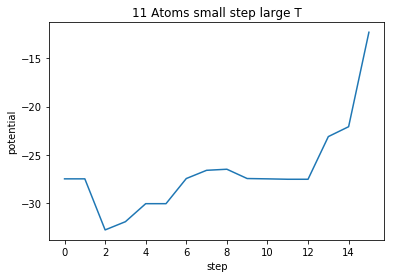

In [69]:
plt.plot(x,N[:,0])
plt.xlabel('step')
plt.ylabel('potential')
plt.title('11 Atoms small step large T')
plt.show()

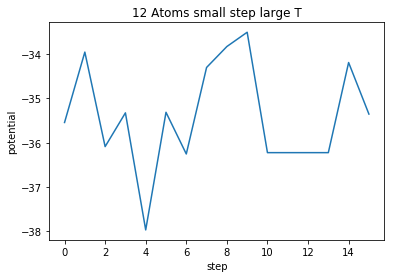

In [68]:
plt.plot(x,N[:,1])
plt.xlabel('step')
plt.ylabel('potential')
plt.title('12 Atoms small step large T')
plt.show()

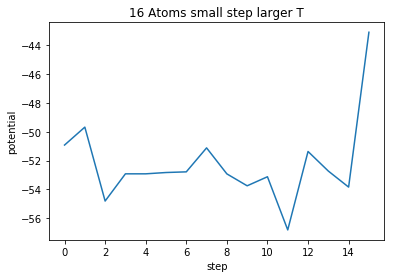

In [67]:
plt.plot(x,N[:,2])
plt.xlabel('step')
plt.ylabel('potential')
plt.title('16 Atoms small step larger T')
plt.show()

Small step values and large T values seem to locate the global minimum of the clusters within 15 attempts most of the time.
T should become larger in porportion to the growing number of atoms in a cluster.

## Speed Test

In [65]:
%timeit LjN_min(11,15,10,3) # 15 iterations 11 atoms

1 loop, best of 3: 17.3 s per loop


In [66]:
%timeit LjN_min(20,15,10,3) # 15 iterations 20 atoms

1 loop, best of 3: 56.9 s per loop
